In [1]:
pip install Kaggle --upgrade

In [97]:
# from google.colab import files
# files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c b8competition2

  0% 0.00/97.4k [00:00<?, ?B/s]
100% 97.4k/97.4k [00:00<00:00, 30.0MB/s]
  0% 0.00/31.3k [00:00<?, ?B/s]
100% 31.3k/31.3k [00:00<00:00, 30.0MB/s]


# analyze data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

In [7]:
train=pd.read_csv("Electronics_train.csv")
test=pd.read_csv("Electronics_testx.csv")

In [9]:
train.head(5)

,Unnamed: 0,BP,blue,c_speed,dual,front_c,4G,m_int,m_dep,m_wt,n_cores,prim_c,px_h,px_w,ram,sc_h,sc_w,talk_t,3G,ts,wifi,target
0,0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
test.head(5)

,Unnamed: 0,BP,blue,c_speed,dual,front_c,4G,m_int,m_dep,m_wt,n_cores,prim_c,px_h,px_w,ram,sc_h,sc_w,talk_t,3G,ts,wifi
0,0,1225,0,0.7,1,6,0,60,0.1,107,2,15,10,1567,2423,17,11,6,1,0,0
1,1,1970,1,0.5,1,0,1,15,1.0,132,2,0,1399,1684,1658,15,9,20,1,1,1
2,2,1186,1,0.5,1,2,0,21,0.4,160,8,4,68,584,2361,17,8,7,1,0,0
3,3,1762,0,0.7,0,7,0,60,0.1,157,4,10,643,790,1380,14,5,14,1,0,0
4,4,1731,1,1.4,1,4,1,4,0.5,163,6,18,809,1988,3892,5,1,4,1,1,1


In [11]:
train.drop(['Unnamed: 0'],axis=1, inplace=True )
test.drop(['Unnamed: 0'], axis=1,  inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BP       1500 non-null   int64  
 1   blue     1500 non-null   int64  
 2   c_speed  1500 non-null   float64
 3   dual     1500 non-null   int64  
 4   front_c  1500 non-null   int64  
 5   4G       1500 non-null   int64  
 6   m_int    1500 non-null   int64  
 7   m_dep    1500 non-null   float64
 8   m_wt     1500 non-null   int64  
 9   n_cores  1500 non-null   int64  
 10  prim_c   1500 non-null   int64  
 11  px_h     1500 non-null   int64  
 12  px_w     1500 non-null   int64  
 13  ram      1500 non-null   int64  
 14  sc_h     1500 non-null   int64  
 15  sc_w     1500 non-null   int64  
 16  talk_t   1500 non-null   int64  
 17  3G       1500 non-null   int64  
 18  ts       1500 non-null   int64  
 19  wifi     1500 non-null   int64  
 20  target   1500 non-null   int64  
dtypes: float64(2),

In [13]:
train.describe()

,BP,blue,c_speed,dual,front_c,4G,m_int,m_dep,m_wt,n_cores,prim_c,px_h,px_w,ram,sc_h,sc_w,talk_t,3G,ts,wifi,target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1240.944667,0.483333,1.521067,0.509333,4.302000,0.515333,32.568000,0.499867,140.974667,4.502000,9.872667,649.310000,1249.068000,2127.647333,12.335333,5.754000,11.121333,0.757333,0.510000,0.516000,1.504667
std,439.306020,0.499889,0.815769,0.500080,4.350565,0.499932,18.156243,0.285776,35.208168,2.296122,6.074843,443.934741,428.751035,1097.176701,4.203173,4.330279,5.397966,0.428838,0.500067,0.499911,1.120781
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,258.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,110.000000,3.000000,5.000000,286.750000,878.750000,1185.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1241.000000,0.000000,1.500000,1.000000,3.000000,1.000000,33.000000,0.500000,142.000000,4.000000,10.000000,561.500000,1248.500000,2153.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1614.250000,1.000000,2.225000,1.000000,7.000000,1.000000,49.000000,0.700000,171.250000,7.000000,15.000000,956.250000,1613.250000,3072.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1949.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


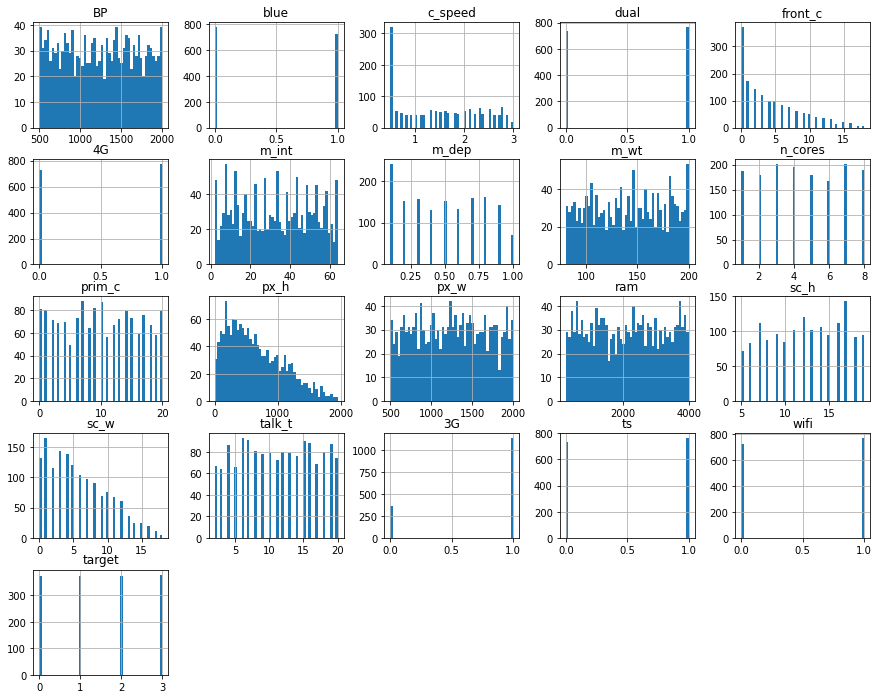

In [14]:
#Histogram
%matplotlib inline
train.hist(bins=50, figsize=(15, 12))
warnings.filterwarnings(action='ignore')

In [15]:
bin_c=['blue', 'dual', '4G', '3G', 'ts', 'wifi']
num_c=['BP', 'm_int', 'm_wt', 'px_h', 'px_w', 'ram',
       'front_c', 'm_dep', 'n_cores', 'prim_c', 'sc_h', 
      'sc_w', 'talk_t']

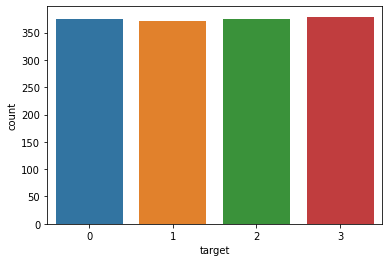

In [16]:
#Target
sns.countplot(x='target', data=train)

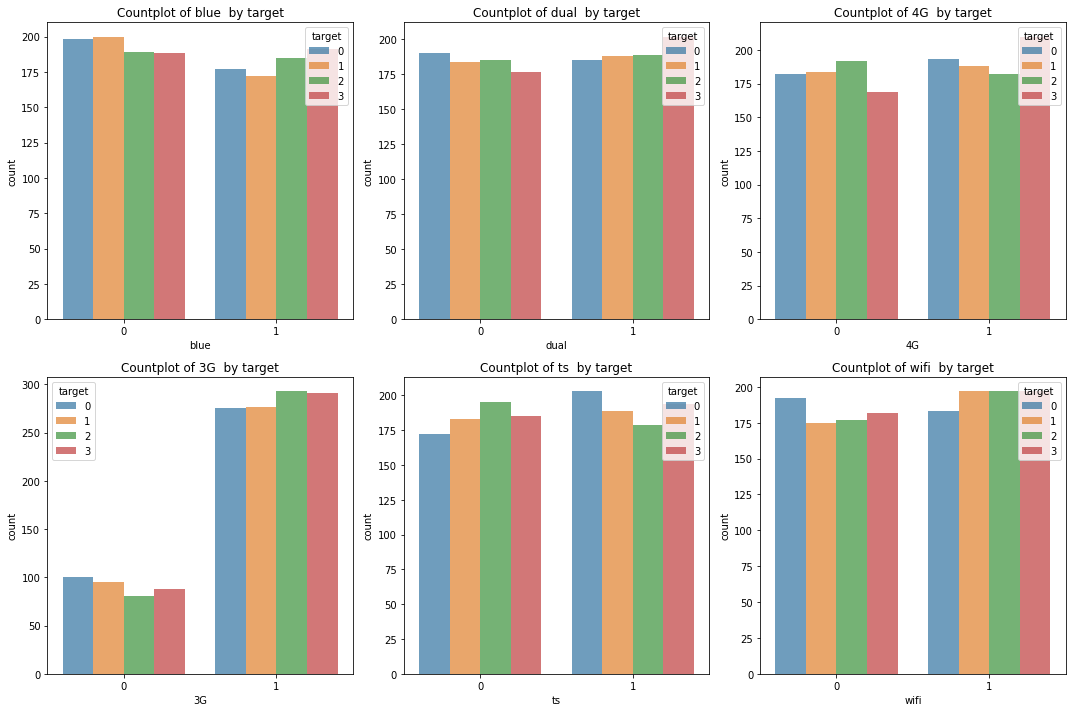

In [17]:
#Categorical features
plt.figure(figsize=(15,10))

n=1
for f in bin_c:
    plt.subplot(2,3,n)
    sns.countplot(x=f, hue='target', alpha=0.7, data=train)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
    
plt.tight_layout()
plt.show()

In [18]:
corr=train.corr()
matrix = np.triu(corr)

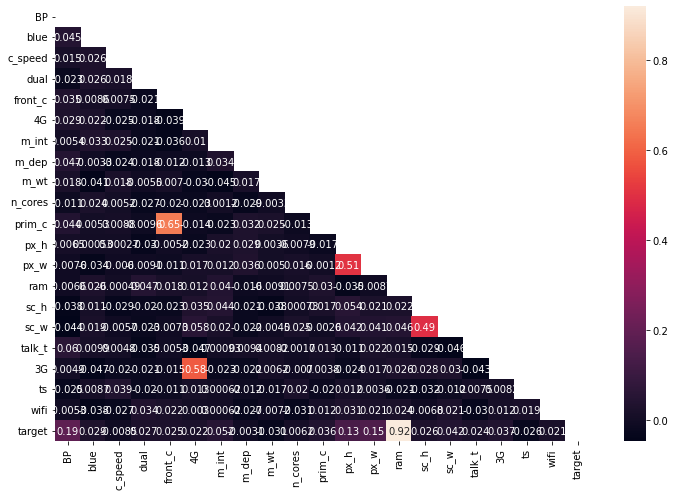

In [19]:
#Correlation matrix
%matplotlib inline
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, mask=matrix)

In [20]:
corr['target'].abs().sort_values(ascending=False)

target     1.000000
ram        0.918958
BP         0.189038
px_w       0.153033
px_h       0.134545
m_int      0.051798
sc_w       0.041954
3G         0.037057
prim_c     0.036389
m_wt       0.031087
blue       0.028716
dual       0.026703
ts         0.026270
sc_h       0.025653
front_c    0.025090
talk_t     0.024496
4G         0.022494
wifi       0.020703
c_speed    0.008498
n_cores    0.006218
m_dep      0.003122
Name: target, dtype: float64

# Preprocessing data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
y_train=train['target']
X_train=train.drop(['target'], axis=1)
X_test=test

In [23]:
#Split into validation data
X_train1, X_valid, y_train1, y_valid=train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train1.shape, X_valid.shape)

(1200, 20) (300, 20)


In [24]:
features = ['ram', 'BP', 'px_w', 'px_h', 'm_int', 'sc_w'] 

In [25]:
X_f_train=train[features]
X_f_test=X_test[features]
X_f_train.head()
# 상관관계가 높은 feature로 구성

,ram,BP,px_w,px_h,m_int,sc_w
0,2549,842,756,20,7,7
1,2631,1021,1988,905,53,3
2,2603,563,1716,1263,41,2
3,2769,615,1786,1216,10,8
4,1411,1821,1212,1208,44,2


In [26]:
target_0=train[train['target']==0]
target_1=train[train['target']==1]
target_2=train[train['target']==2]
target_3=train[train['target']==3]

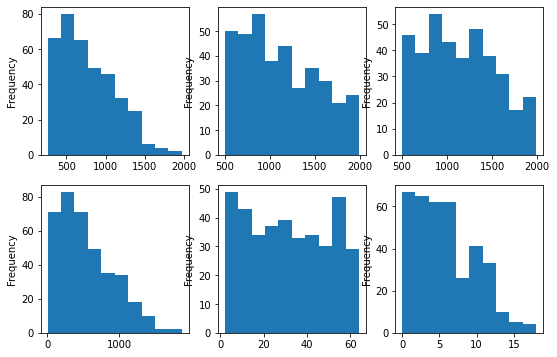

In [27]:
fig, ax = plt.subplots(2,3, figsize=(9, 6))
target_0['ram'].plot(kind='hist', ax=ax[0,0])
target_0['BP'].plot(kind='hist', ax=ax[0,1])
target_0['px_w'].plot(kind='hist', ax=ax[0,2])
target_0['px_h'].plot(kind='hist', ax=ax[1,0])
target_0['m_int'].plot(kind='hist', ax=ax[1,1])
target_0['sc_w'].plot(kind='hist', ax=ax[1,2])

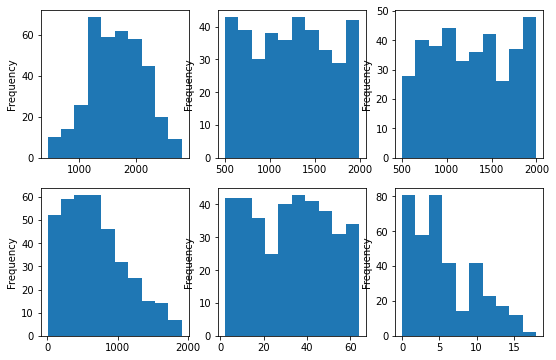

In [28]:
fig, ax = plt.subplots(2,3, figsize=(9, 6))
target_1['ram'].plot(kind='hist', ax=ax[0,0])
target_1['BP'].plot(kind='hist', ax=ax[0,1])
target_1['px_w'].plot(kind='hist', ax=ax[0,2])
target_1['px_h'].plot(kind='hist', ax=ax[1,0])
target_1['m_int'].plot(kind='hist', ax=ax[1,1])
target_1['sc_w'].plot(kind='hist', ax=ax[1,2])

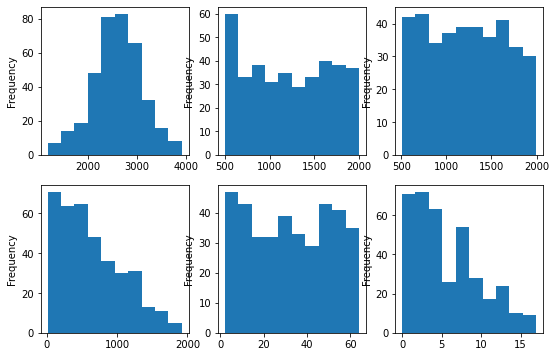

In [29]:
fig, ax = plt.subplots(2,3, figsize=(9, 6))
target_2['ram'].plot(kind='hist', ax=ax[0,0])
target_2['BP'].plot(kind='hist', ax=ax[0,1])
target_2['px_w'].plot(kind='hist', ax=ax[0,2])
target_2['px_h'].plot(kind='hist', ax=ax[1,0])
target_2['m_int'].plot(kind='hist', ax=ax[1,1])
target_2['sc_w'].plot(kind='hist', ax=ax[1,2])

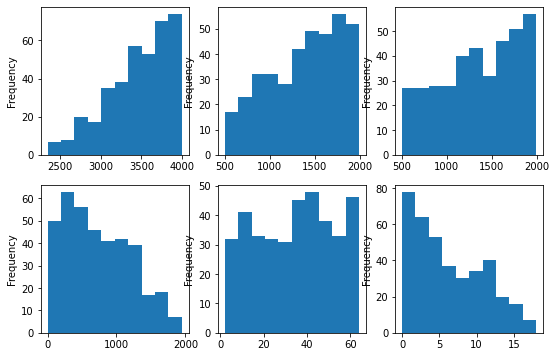

In [30]:
fig, ax = plt.subplots(2,3, figsize=(9, 6))
target_3['ram'].plot(kind='hist', ax=ax[0,0])
target_3['BP'].plot(kind='hist', ax=ax[0,1])
target_3['px_w'].plot(kind='hist', ax=ax[0,2])
target_3['px_h'].plot(kind='hist', ax=ax[1,0])
target_3['m_int'].plot(kind='hist', ax=ax[1,1])
target_3['sc_w'].plot(kind='hist', ax=ax[1,2])

#PCA

In [31]:
from sklearn.decomposition import PCA, KernelPCA

In [32]:
pca=PCA()
pca.fit(X_train)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1 #분산을 95%이상 보존
d

4

In [33]:
pca=PCA(n_components=4)
X_train_reduced=pd.DataFrame(pca.fit_transform(X_train))
X_test_reduced=pd.DataFrame(pca.transform(X_test))
X_train_reduced

,0,1,2,3
0,-436.327512,-788.872016,-399.533599,58.680421
1,-495.295085,699.972585,-224.474879,357.062588
2,-464.004113,775.711148,-673.986299,-94.483916
3,-630.222798,791.876053,-623.039984,-11.557328
4,727.916767,370.170174,585.720964,-391.925692
...,...,...,...,...
1495,1325.518849,-416.940967,228.519421,-105.236436
1496,1827.949878,-333.988714,624.745201,-190.490429
1497,-1722.789300,-399.701923,146.510887,-390.759909
1498,3.654344,-808.759147,-359.152417,-89.725550


In [34]:
X_train1_reduced=pd.DataFrame(pca.transform(X_train1))
X_valid_reduced=pd.DataFrame(pca.transform(X_valid))

#Models

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV 

In [36]:
rf=RandomForestClassifier(random_state=14)

In [37]:
#using original features
scores= cross_validate(estimator = rf, X=X_train, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.87666667 0.87       0.88       0.89666667 0.86666667]
Mean CV accuracy: 0.8779999999999999


In [38]:
#using selected features
scores= cross_validate(estimator = rf, X=X_f_train, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.91666667 0.90666667 0.91       0.92666667 0.90333333]
Mean CV accuracy: 0.9126666666666667


In [39]:
#using pca-reduced features
scores= cross_validate(estimator = rf, X=X_train_reduced, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.93333333 0.90666667 0.93333333 0.94333333 0.92666667]
Mean CV accuracy: 0.9286666666666668


In [40]:
rf.fit(X_train_reduced, y_train)
pred = rf.predict(X_test_reduced)

#Hyperparameter Tuning

In [41]:
params = {
    'max_depth' : [8, 10, 12, 14, 16],
    'min_samples_leaf' : [1, 2, 3, 4, 6],
    'min_samples_split' : [4, 6, 8, 10]
}

rf=RandomForestClassifier(random_state=42, n_jobs=-1)
grid=GridSearchCV(rf, param_grid=params, cv=3, n_jobs=-1)
grid.fit(X_train_reduced, y_train)
print(grid.best_params_, grid.best_score_)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4} 0.9233333333333333


In [42]:
rf=RandomForestClassifier(**grid.best_params_, random_state=10)
rf.fit(X_train_reduced, y_train)
pred = rf.predict(X_test_reduced)

In [43]:
scores= cross_validate(estimator = rf, X=X_train_reduced, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.91666667 0.91666667 0.92666667 0.93666667 0.92      ]
Mean CV accuracy: 0.9233333333333332


#Linear Discriminant Analysis (lda)

In [44]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train1, y_train1)
accuracy_score(lda.predict(X_valid),y_valid)

0.9333333333333333

#Quadratic Discriminant Analysis (qda)

In [45]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_train1, y_train1)
accuracy_score(lda.predict(X_valid),y_valid)

0.9333333333333333

#SVC (svm)

In [46]:
from sklearn.svm import SVC

sc=StandardScaler()
X_train_r_sc=sc.fit_transform(X_train_reduced)
X_test_r_sc=sc.fit_transform(X_test_reduced)

In [47]:
svm=SVC(C=1500, gamma=0.001,  kernel='rbf', random_state=42, probability=True)
scores= cross_validate(estimator = svm, X=X_train_r_sc, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.97       0.96       0.97       0.96       0.97666667]
Mean CV accuracy: 0.9673333333333334


#GBM(gbc)

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time

In [50]:
gbc=GradientBoostingClassifier(random_state=15, n_estimators=400, learning_rate=0.1)
# gbc.fit(X_train, y_train)
scores= cross_validate(estimator = gbc, X=X_train, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.9        0.90666667 0.89       0.91       0.90333333]
Mean CV accuracy: 0.9019999999999999


In [49]:
gbc=GradientBoostingClassifier(random_state=15, n_estimators=400, learning_rate=0.1)
# gbc.fit(X_train, y_train)
scores= cross_validate(estimator = gbc, X=X_train_reduced, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.92       0.89666667 0.91666667 0.91333333 0.88333333]
Mean CV accuracy: 0.9059999999999999


##Hyperparameter Tuning

In [51]:
params= {
    'n_estimators':[100, 200, 300, 400, 500],
    'learning_rate' : [0.01, 0.05, 0.1]
}
start_time=time.time()
grid=GridSearchCV(gbc, param_grid=params, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
print('Fit time: ', time.time()-start_time)
print(grid.best_params_, grid.best_score_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Fit time:  147.77088594436646
{'learning_rate': 0.1, 'n_estimators': 200} 0.8946666666666667


#Light GBM (lgbm)

In [52]:
X_f_train1=X_train1[features]
X_f_valid=X_valid[features]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train1_r_sc=sc.fit_transform(X_train1_reduced)
X_valid_r_sc=sc.fit_transform(X_valid_reduced)

In [53]:
lgbm=LGBMClassifier(n_estimators=800, learning_rate=0.15, random_state=42)
# gbc.fit(X_train, y_train)
scores= cross_validate(estimator = lgbm, X=X_train_r_sc, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.91333333 0.91       0.92       0.94333333 0.91666667]
Mean CV accuracy: 0.9206666666666667


In [54]:
evals=[(X_valid_r_sc, y_valid)]

lgbm=LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=7)
lgbm.fit(X_train1_r_sc, y_train1, early_stopping_rounds=10, eval_set=evals)
print('Acc: ', accuracy_score(y_valid, lgbm.predict(X_valid_r_sc)))

[1]	valid_0's multi_logloss: 1.32229
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 1.26182
[3]	valid_0's multi_logloss: 1.20701
[4]	valid_0's multi_logloss: 1.15791
[5]	valid_0's multi_logloss: 1.1119
[6]	valid_0's multi_logloss: 1.06975
[7]	valid_0's multi_logloss: 1.02934
[8]	valid_0's multi_logloss: 0.991891
[9]	valid_0's multi_logloss: 0.957315
[10]	valid_0's multi_logloss: 0.924463
[11]	valid_0's multi_logloss: 0.894288
[12]	valid_0's multi_logloss: 0.865093
[13]	valid_0's multi_logloss: 0.838161
[14]	valid_0's multi_logloss: 0.813264
[15]	valid_0's multi_logloss: 0.789561
[16]	valid_0's multi_logloss: 0.766633
[17]	valid_0's multi_logloss: 0.74437
[18]	valid_0's multi_logloss: 0.723299
[19]	valid_0's multi_logloss: 0.703351
[20]	valid_0's multi_logloss: 0.684084
[21]	valid_0's multi_logloss: 0.666341
[22]	valid_0's multi_logloss: 0.649161
[23]	valid_0's multi_logloss: 0.632126
[24]	valid_0's multi_logloss: 0.616942
[25]	valid_0's multi

In [55]:
evals=[(X_valid_r_sc, y_valid)]

lgbm=LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=7)
lgbm.fit(X_train1_r_sc, y_train1, early_stopping_rounds=10, eval_set=evals)
print('Acc: ', accuracy_score(y_valid, lgbm.predict(X_valid_r_sc)))

[1]	valid_0's multi_logloss: 1.32229
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 1.26182
[3]	valid_0's multi_logloss: 1.20701
[4]	valid_0's multi_logloss: 1.15791
[5]	valid_0's multi_logloss: 1.1119
[6]	valid_0's multi_logloss: 1.06975
[7]	valid_0's multi_logloss: 1.02934
[8]	valid_0's multi_logloss: 0.991891
[9]	valid_0's multi_logloss: 0.957315
[10]	valid_0's multi_logloss: 0.924463
[11]	valid_0's multi_logloss: 0.894288
[12]	valid_0's multi_logloss: 0.865093
[13]	valid_0's multi_logloss: 0.838161
[14]	valid_0's multi_logloss: 0.813264
[15]	valid_0's multi_logloss: 0.789561
[16]	valid_0's multi_logloss: 0.766633
[17]	valid_0's multi_logloss: 0.74437
[18]	valid_0's multi_logloss: 0.723299
[19]	valid_0's multi_logloss: 0.703351
[20]	valid_0's multi_logloss: 0.684084
[21]	valid_0's multi_logloss: 0.666341
[22]	valid_0's multi_logloss: 0.649161
[23]	valid_0's multi_logloss: 0.632126
[24]	valid_0's multi_logloss: 0.616942
[25]	valid_0's multi

#XGBoost (xgb)

In [56]:
xgb=XGBClassifier(n_estimators=400, max_depth=6, random_state=42, learning_rate=0.1)
scores= cross_validate(estimator = lgbm, X=X_train_r_sc, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.93       0.89666667 0.92333333 0.95333333 0.92333333]
Mean CV accuracy: 0.9253333333333333


#Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_train1_sc=sc.transform(X_train1)
X_valid_sc=sc.transform(X_valid)
X_test_sc=sc.transform(X_test)

In [58]:
lr=LogisticRegression(C=400, solver='lbfgs', random_state=42)
scores= cross_validate(estimator = lr, X=X_train_sc, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.97       0.96333333 0.96666667 0.96       0.98333333]
Mean CV accuracy: 0.9686666666666666


In [59]:
lr.fit(X_train_sc, y_train)
pred=lr.predict(X_test_sc)

#KNeighbors

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn=KNeighborsClassifier(n_neighbors=9)
scores= cross_validate(estimator = knn, X=X_train_reduced, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.94333333 0.94333333 0.93666667 0.92       0.94      ]
Mean CV accuracy: 0.9366666666666668


#Stacking

In [62]:
from sklearn.model_selection import KFold

def get_stacking_datasets(model, x_train_n, y_train_n, x_test_n, n_folds):
    #cv
    kf=KFold(n_folds, shuffle=False,)
    
    train_fold_pred=np.zeros((x_train_n.shape[0], 1))
    test_pred=np.zeros((x_test_n.shape[0], n_folds))
    print(model.__class__.__name__, '모델 시작')
    
    for folder_counter, (train_idx, valid_idx) in enumerate(kf.split(x_train_n)):
        print(f"Fold 횟수: {folder_counter+1}")
        print(train_idx)
        x_tr=x_train_n.iloc[train_idx]
        y_tr=y_train_n.iloc[train_idx]
        x_te=x_train_n.iloc[valid_idx]
        
        model.fit(x_tr, y_tr)
        train_fold_pred[valid_idx, :]=model.predict(x_te).reshape(-1,1)
        test_pred[:, folder_counter]=model.predict(x_test_n)
        
    test_pred_mean=np.mean(test_pred, axis=1).reshape(-1,1)
    
    return train_fold_pred, test_pred_mean

In [63]:
svm_train, svm_test=get_stacking_datasets(svm, X_train, y_train, X_test, 5)
lr_train, lr_test=get_stacking_datasets(lr, X_train_reduced, y_train, X_test_reduced, 5)
lda_train, lda_test=get_stacking_datasets(lda, X_train_reduced, y_train, X_test_reduced, 5)
xgb_train, xgb_test=get_stacking_datasets(xgb, X_train_reduced, y_train, X_test_reduced, 5)
knn_train, knn_test=get_stacking_datasets(knn, X_train, y_train, X_test, 5)

SVC 모델 시작
Fold 횟수: 1
[ 300  301  302 ... 1497 1498 1499]
Fold 횟수: 2
[   0    1    2 ... 1497 1498 1499]
Fold 횟수: 3
[   0    1    2 ... 1497 1498 1499]
Fold 횟수: 4
[   0    1    2 ... 1497 1498 1499]
Fold 횟수: 5
[   0    1    2 ... 1197 1198 1199]
LogisticRegression 모델 시작
Fold 횟수: 1
[ 300  301  302 ... 1497 1498 1499]
Fold 횟수: 2
[   0    1    2 ... 1497 1498 1499]
Fold 횟수: 3
[   0    1    2 ... 1497 1498 1499]
Fold 횟수: 4
[   0    1    2 ... 1497 1498 1499]
Fold 횟수: 5
[   0    1    2 ... 1197 1198 1199]
LinearDiscriminantAnalysis 모델 시작
Fold 횟수: 1
[ 300  301  302 ... 1497 1498 1499]
Fold 횟수: 2
[   0    1    2 ... 1497 1498 1499]
Fold 횟수: 3
[   0    1    2 ... 1497 1498 1499]
Fold 횟수: 4
[   0    1    2 ... 1497 1498 1499]
Fold 횟수: 5
[   0    1    2 ... 1197 1198 1199]
XGBClassifier 모델 시작
Fold 횟수: 1
[ 300  301  302 ... 1497 1498 1499]
Fold 횟수: 2
[   0    1    2 ... 1497 1498 1499]
Fold 횟수: 3
[   0    1    2 ... 1497 1498 1499]
Fold 횟수: 4
[   0    1    2 ... 1497 1498 1499]
Fold 횟수: 5
[   0   

In [64]:
new_X_train=np.concatenate((svm_train, lr_train, knn_train), axis=1)
new_X_test=np.concatenate((svm_test, lr_test, knn_test), axis=1)
print(new_X_train.shape)
print(X_train.shape)

(1500, 3)
(1500, 20)


In [65]:
rf=RandomForestClassifier(random_state=14)
scores= cross_validate(estimator = rf, X=new_X_train, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.75333333 0.92       0.94333333 0.94333333 0.95333333]
Mean CV accuracy: 0.9026666666666667


In [66]:
lr=LogisticRegression()
scores= cross_validate(estimator = lr, X=new_X_train, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.95666667 0.94       0.94333333 0.94333333 0.95333333]
Mean CV accuracy: 0.9473333333333332


In [67]:
lgb2=LGBMClassifier(n_estimators=300, random_state=42)
scores= cross_validate(estimator = lgb2, X=new_X_train, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.95666667 0.92       0.93666667 0.94333333 0.95333333]
Mean CV accuracy: 0.942


In [68]:
lr.fit(new_X_train, y_train)
pred=lr.predict(new_X_test)

In [69]:
rf.fit(new_X_train, y_train)
pred=lr.predict(new_X_test)

#Voting

In [70]:
from sklearn.ensemble import VotingClassifier

In [71]:
vo_soft=VotingClassifier(estimators=[('SVM', svm),('LR', lr),('KNN', knn)], voting='soft')
vo_soft.fit(X_train1_sc, y_train1)
v_pred=vo_soft.predict(X_valid_sc)
v_pred

array([0, 0, 2, 2, 1, 0, 0, 3, 0, 3, 3, 0, 2, 0, 3, 2, 3, 0, 1, 2, 2, 0,
       0, 2, 0, 3, 1, 1, 2, 3, 2, 0, 2, 3, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2,
       1, 2, 0, 2, 0, 3, 1, 1, 2, 2, 0, 0, 3, 0, 1, 0, 3, 3, 2, 3, 0, 0,
       3, 3, 1, 3, 1, 1, 2, 1, 3, 1, 0, 3, 2, 3, 0, 0, 3, 3, 0, 3, 3, 2,
       1, 1, 1, 1, 1, 2, 3, 3, 0, 3, 2, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1,
       3, 1, 2, 3, 2, 3, 2, 3, 3, 0, 0, 0, 1, 2, 0, 3, 2, 0, 3, 1, 1, 3,
       2, 1, 3, 0, 1, 1, 3, 2, 3, 0, 1, 3, 0, 1, 1, 0, 3, 1, 1, 2, 1, 2,
       1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 3, 0, 1, 3, 1, 3, 0, 1, 0, 3, 0,
       3, 1, 0, 1, 2, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       2, 3, 2, 2, 1, 0, 0, 2, 3, 0, 3, 1, 2, 3, 0, 3, 1, 2, 2, 3, 1, 1,
       0, 0, 2, 3, 1, 0, 3, 0, 2, 1, 0, 3, 2, 1, 3, 1, 2, 0, 0, 1, 2, 0,
       2, 1, 3, 2, 3, 1, 0, 1, 1, 0, 2, 0, 2, 3, 1, 1, 0, 0, 2, 1, 2, 1,
       1, 2, 2, 3, 1, 3, 2, 2, 3, 0, 2, 3, 1, 1, 3, 2, 1, 3, 2, 3, 1, 3,
       2, 1, 2, 0, 2, 3, 1, 2, 2, 2, 3, 3, 2, 2])

In [72]:
scores= cross_validate(estimator = vo_soft, X=X_train_sc, y=y_train, scoring=['accuracy'],
                      cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %s'% scores['test_accuracy'])
print('Mean CV accuracy: %s'% np.mean(scores['test_accuracy']))

CV accuracy: [0.96       0.92666667 0.95333333 0.94       0.96      ]
Mean CV accuracy: 0.9480000000000001


In [73]:
accuracy_score(v_pred, y_valid)

0.94

In [74]:
vo_hard=VotingClassifier(estimators=[('SVM', svm),('LR', lr),('KNN', knn)], voting='hard')
vo_hard.fit(X_train1, y_train1)
v_pred2=vo_hard.predict(X_valid)

In [75]:
accuracy_score(v_pred2, y_valid)

0.7733333333333333

In [76]:
pred=vo_soft.predict(X_test)

#최종

In [93]:
svm=SVC(C=1500, gamma=0.001,  kernel='rbf', random_state=42, probability=True)
svm.fit(X_train_r_sc,y_train)
pred = svm.predict(X_test_r_sc)
pred

array([2, 2, 1, 1, 3, 0, 1, 2, 2, 3, 1, 1, 3, 0, 1, 0, 1, 3, 3, 3, 3, 1,
       1, 0, 0, 3, 2, 3, 1, 1, 0, 3, 3, 0, 3, 3, 1, 2, 2, 0, 2, 3, 3, 3,
       2, 2, 3, 3, 2, 1, 1, 1, 2, 0, 1, 0, 3, 2, 0, 1, 2, 2, 2, 2, 0, 0,
       0, 1, 3, 1, 0, 3, 2, 0, 3, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 3, 1, 1,
       2, 3, 3, 2, 1, 2, 1, 2, 3, 0, 2, 3, 1, 0, 3, 1, 0, 2, 1, 2, 1, 2,
       3, 2, 3, 2, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 0, 0, 3, 3, 1, 0, 3,
       3, 1, 0, 3, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 3,
       0, 3, 1, 2, 3, 3, 1, 1, 1, 3, 2, 1, 2, 1, 1, 2, 3, 0, 1, 1, 3, 2,
       1, 2, 2, 3, 2, 1, 1, 1, 3, 3, 3, 0, 3, 2, 3, 1, 3, 3, 1, 2, 3, 3,
       0, 0, 0, 2, 2, 0, 2, 0, 1, 1, 3, 3, 0, 1, 2, 0, 2, 0, 2, 3, 2, 0,
       2, 0, 2, 0, 2, 1, 3, 3, 1, 3, 0, 0, 2, 2, 3, 3, 1, 2, 1, 1, 3, 1,
       0, 3, 1, 0, 1, 2, 1, 3, 0, 1, 3, 0, 2, 3, 3, 2, 0, 3, 1, 1, 0, 2,
       2, 2, 0, 3, 3, 0, 3, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3, 2, 0, 2, 1,
       2, 3, 1, 1, 3, 1, 1, 1, 3, 0, 1, 0, 1, 3, 0,

In [94]:
y_pred = pd.DataFrame(pred)
y_pred.columns =['target']
y_pred['index'] = y_pred.index
y_pred = y_pred[['index', 'target']]

y_pred.to_csv("svc.csv", header=True, index=False)

In [95]:
submit = pd.read_csv("svc.csv")
submit

,index,target
0,0,2
1,1,2
2,2,1
3,3,1
4,4,3
...,...,...
495,495,0
496,496,2
497,497,3
498,498,0


In [96]:
#!kaggle competitions submit -c b8competition2 -f /content/svc.csv -m 'commit svc model'